# <center> Практична робота №6 </center>
## **Тема. Жадібні алгоритми. Наближене розв’язання екстремальних задач**
## **Мета:** набути практичних навичок застосування деяких жадібних алгоритмів для розв’язання екстремальних задач.
### _Викoнав Данііл Танасієнко 17.12.24_

## <center> Хід роботи </center>

### Виконати індивідуальне завдання. Завдання полягає у розв’язанні єдиного завдання для всіх, вибравши граф згідно з варіантом.

### *Індивідуальне завдання.*
1. Розв’язати задачу комівояжера для графа, заданого варіантом, використовуючи код, наведений вище.
2. Візуалізувати граф.
3. Обґрунтувати асимптотику для обох алгоритмів, неведену в табл. 1.4.

### Заданий зважений граф: $[(1,2,6), (1,3,7), (1,4,9), (1,5,10), (2,3,5), (2,4,6), (2,5,8), (3,4,4), (3,5,6), (4,5,3)]$

# Візуалізація графа

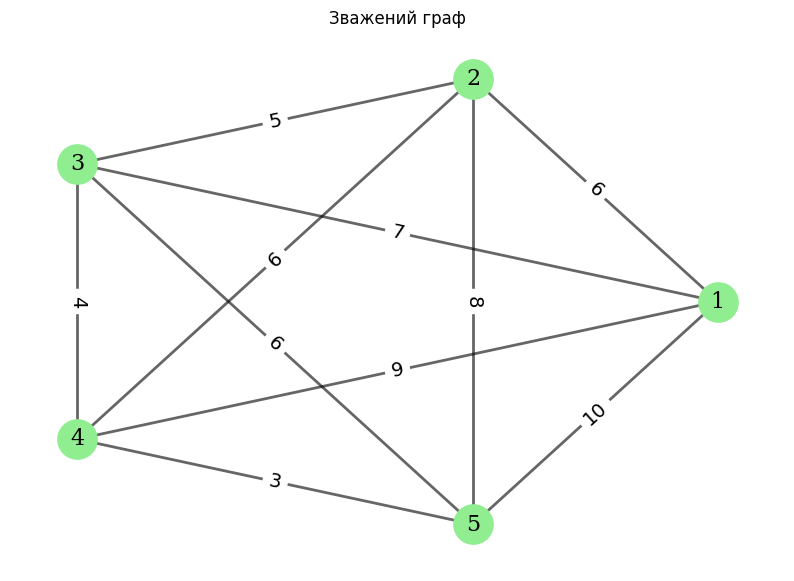

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Створюємо граф
G = nx.Graph()

# Додаємо вершини
G.add_nodes_from([1, 2, 3, 4, 5])

# Додаємо нові ребра з вагами
edges = [(1, 2, 6), (1, 3, 7), (1, 4, 9), (1, 5, 10), 
         (2, 3, 5), (2, 4, 6), (2, 5, 8), 
         (3, 4, 4), (3, 5, 6), (4, 5, 3)]
G.add_weighted_edges_from(edges)

# Генерація позицій для відображення вершин
pos = nx.circular_layout(G)

# Візуалізація графа
plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightgreen')  # Змінили колір та розмір вузлів
nx.draw_networkx_labels(G, pos, font_size=16, font_family='serif')

# Візуалізація ребер
nx.draw_networkx_edges(G, pos, width=2, edge_color='black', alpha=0.6)  # Зменшили прозорість

# Додавання підписів ваг ребер
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14)

# Показуємо графік
plt.title("Зважений граф")
plt.axis('off') 
plt.show()



# Розв’язати задачу комівояжера для графа, заданого варіантом, використовуючи код, наведений вище.

Маршрут, знайдений алгоритмом найближчого сусіда: [4, 5, 3, 2, 1, 4]


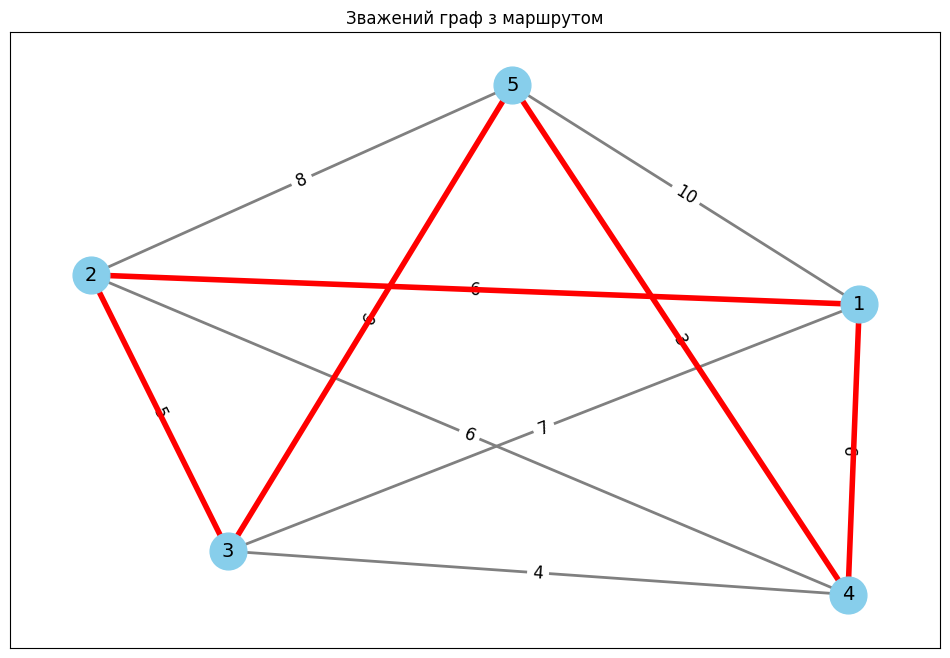

In [25]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Алгоритм найближчого сусіда для графа
def nearest_neighbor_algorithm_graph(G):
    nodes = list(G.nodes)
    N = len(nodes)
    visited = [False] * N
    tour = []
    
    # Вибираємо довільну точку
    current_node = int(np.random.choice(nodes))
    tour.append(current_node)
    visited[nodes.index(current_node)] = True
    
    for _ in range(1, N):
        previous_node = current_node
        min_distance = float('inf')
        
        # Шукаємо найближче непосещене сусіднє місто
        for neighbor in G.neighbors(previous_node):
            if not visited[nodes.index(neighbor)]:
                distance = G[previous_node][neighbor]['weight']
                if distance < min_distance:
                    min_distance = distance
                    current_node = neighbor
        
        tour.append(current_node)
        visited[nodes.index(current_node)] = True
    
    # Повертаємось в першу точку
    tour.append(tour[0])
    return tour

# Створення графа
G = nx.Graph()

# Додавання вершин та ребер
edges = [
(1,2,6), (1,3,7), (1,4,9), 
(1,5,10), (2,3,5), (2,4,6), 
(2,5,8), (3,4,4), (3,5,6), (4,5,3)
]
G.add_weighted_edges_from(edges)

# Застосування алгоритму найближчого сусіда
tour = nearest_neighbor_algorithm_graph(G)
print("Маршрут, знайдений алгоритмом найближчого сусіда:", tour)

# Візуалізація графа
# Генеруємо позиції для відображення вершин
pos = nx.spring_layout(G)  # Функція для розташування вершин у гармонійному вигляді

# Візуалізація вузлів
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')

# Візуалізація ребер
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='gray')

# Додавання підписів для ваг ребер
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Виділяємо маршрут
tour_edges = [(tour[i], tour[i+1]) for i in range(len(tour)-1)]
nx.draw_networkx_edges(G, pos, edgelist=tour_edges, width=4, edge_color='red')

# Показуємо графік
plt.title("Зважений граф з маршрутом")
plt.show()



# Обґрунтувати асимптотику для обох алгоритмів, неведену в табл. 1.4.

#### 1. **Груба сила: асимптотична складність $O(n!)$**

Алгоритм грубої сили базується на повному переборі всіх можливих перестановок $n$ міст. Для кожної з них обчислюється загальна довжина маршруту, і обирається найкоротший.

1. **Кількість перестановок:**  
   Усього існує $n!$ різних перестановок $n$ міст.

2. **Часова складність:**  
   - Щоб знайти довжину маршруту для однієї перестановки, потрібно $O(n)$ операцій (прохід через $n$ міст).  
   - Повний перебір усіх перестановок потребує $O(n! \cdot n)$ часу. Однак через швидке зростання $n!$ ця частина домінує. Отже, асимптотична складність — **$O(n!)$**.

3. **Основний недолік:**  
   Через надзвичайно швидке зростання $n!$ алгоритм стає непридатним для використання при великих значеннях $n$.


#### 2. **Найближчий сусід: асимптотична складність $O(n^2 \cdot \log n)$**

Алгоритм найближчого сусіда працює за жадібним підходом: починаючи з певного міста, він кожного разу вибирає наступне місто, яке є найближчим до поточного, і так будується цикл.

1. **Побудова матриці відстаней:**  
   - Спочатку потрібно створити матрицю відстаней між усіма парами міст, що займає $O(n^2)$ операцій.

2. **Жадібний вибір:**  
   - Для кожного міста потрібно знайти найближче, що вимагає пошуку мінімуму серед $n - 1$ можливих відстаней.
   - Якщо використовуються ефективні структури даних (наприклад, збалансовані дерева або черги з пріоритетом), пошук найближчого міста можна виконати за $O(\log n)$.  
   - Цей процес повторюється для кожного з $n$ міст, що дає загальну складність для жадібної частини алгоритму — $O(n \cdot \log n)$.

3. **Загальна складність:**  
   - Оскільки потрібно додати складності побудови матриці $O(n^2)$ та жадібного вибору для кожного міста $O(n \cdot \log n)$, загальна складність алгоритму — $O(n^2 \cdot \log n)$. Тут $n^2$ зазвичай є домінуючим членом.

4. **Переваги:**  
   - Алгоритм є значно швидшим за метод грубої сили.
   - Однак результат часто не є оптимальним, оскільки жадібний підхід може призводити до потрапляння в локальні мінімуми.


## <center> Контрольні питання </center>

### 1) Що таке жадібний алгоритм?

**Жадібний алгоритм** — це метод, який на кожному кроці вибирає найкраще локальне рішення, сподіваючись, що це призведе до оптимального глобального результату. Жадібний підхід часто застосовується до задач, де кожне локальне оптимальне рішення веде до глобального оптимуму, наприклад, у задачах мінімального кістякового дерева або задачі про рюкзак. Однак цей підхід не завжди гарантує оптимальні результати для всіх типів задач, оскільки в деяких випадках локальні оптимуми можуть не призвести до глобального.


### 2) Головні принципи роботи жадібних алгоритмів

1. **Вибір локального оптимуму:**  
   На кожному кроці алгоритм вибирає найкраще можливе рішення з доступних варіантів, не враховуючи наслідки цього вибору для наступних кроків.

2. **Ітеративний процес:**  
   Алгоритм здійснює вибір на кожному етапі, поступово побудовуючи рішення. Після кожного кроку вибір більше не переглядається.

3. **Відсутність повернення назад:**  
   Жадібний алгоритм не змінює своїх рішень, навіть якщо пізніше виявляється, що інший вибір був би кращим. Це робить алгоритм ефективним, але інколи призводить до не оптимальних результатів.

4. **Розв'язування підзадач:**  
   Задача розбивається на підзадачі, для яких на кожному етапі приймається оптимальне рішення. Це дозволяє швидко знайти рішення без необхідності перевіряти всі можливі варіанти.


1. **Вибір локального оптимуму:**  
   На кожному кроці алгоритм вибирає найкраще можливе рішення з доступних варіантів, не враховуючи наслідки цього вибору для наступних кроків.

2. **Ітеративний процес:**  
   Алгоритм здійснює вибір на кожному етапі, поступово побудовуючи рішення. Після кожного кроку вибір більше не переглядається.

3. **Відсутність повернення назад:**  
   Жадібний алгоритм не змінює своїх рішень, навіть якщо пізніше виявляється, що інший вибір був би кращим. Це робить алгоритм ефективним, але інколи призводить до не оптимальних результатів.

4. **Розв'язування підзадач:**  
   Задача розбивається на підзадачі, для яких на кожному етапі приймається оптимальне рішення. Це дозволяє швидко знайти рішення без необхідності перевіряти всі можливі варіанти.


### 3) Яка головна відмінність між жадібними алгоритмами та динамічним програмуванням?

1. **Жадібні алгоритми:**  
   - Жадібний алгоритм на кожному кроці вибирає локально оптимальне рішення, сподіваючись, що це призведе до глобального оптимуму.
   - Не перевіряє всі можливі варіанти рішень і не зберігає попередні результати.
   - Може призвести до не оптимальних рішень, якщо локальний вибір не призводить до глобального оптимуму.

2. **Динамічне програмування (ДП):**  
   - Динамічне програмування розв'язує задачу шляхом розбиття на підзадачі, зберігаючи рішення цих підзадач для подальшого використання (метод мемоізації або табуляції).
   - Використовує принцип оптимальності, щоб гарантувати знаходження глобально оптимального рішення, перевіряючи всі можливі варіанти.
   - Підходить для задач, де рішення однієї підзадачі залежить від результатів інших підзадач.

**Основна відмінність:** Жадібний алгоритм робить вибір без збереження попередніх рішень і не гарантує оптимальності, тоді як динамічне програмування зберігає результати підзадач і гарантує знаходження оптимального рішення.


### 4) Наведіть приклади задач, які можна розв’язати за допомогою жадібних алгоритмів.

1. **Задача про мінімальне кістякове дерево (MST):**
   - Алгоритми, як-от алгоритм Краскала або Прима, використовують жадібний підхід для знаходження мінімального кістякового дерева, вибираючи на кожному кроці ребра з найменшими вагами.

2. **Задача про рюкзак (Fractional Knapsack):**
   - Для задачі про рюкзак з можливістю дробового пакування (коли можна брати частину предмета) жадібний алгоритм вибирає предмети з найбільшою вагою на одиницю вартості, поки не заповниться рюкзак.

3. **Задача про найкоротший шлях у графі (алгоритм Дейкстри):**
   - Алгоритм Дейкстри використовує жадібний підхід для знаходження найкоротших шляхів від початкової вершини до всіх інших вершин у зваженому графі з невід'ємними вагами.

4. **Задача про покриття множини (Set Covering):**
   - У задачі покриття множини жадібний алгоритм вибирає підмножини з найбільшим покриттям елементів, поки не будуть охоплені всі елементи.

5. **Задача про вибір найменших монет для здачі:**
   - Алгоритм вибирає найбільші монети, які можуть бути використані для здачі певної суми, щоб мінімізувати кількість монет, використаних для здачі.

6. **Задача про оптимальне стиснення даних (Huffman Coding):**
   - Алгоритм Хаффмана використовує жадібний підхід для створення кодування, яке мінімізує загальний обсяг біт для збереження даних.


### 5) Які можуть бути обмеження у використанні жадібних алгоритмів для розв'язання екстремальних задач?

1. **Не завжди гарантують оптимальне рішення:**
   - Жадібний алгоритм вибирає локально оптимальні рішення, що не завжди призводить до глобального оптимуму. Для деяких задач локальний вибір може не бути частиною оптимального загального рішення, що знижує ефективність цього підходу.

2. **Не враховують усі можливі варіанти:**
   - Жадібні алгоритми не перевіряють усі можливі варіанти рішень, а лише найкращі на поточному кроці. Це може призвести до "застрягання" в локальних оптимумах і не дозволяє знайти більш вигідні варіанти, які можна було б виявити при більш детальному аналізі.

3. **Обмеження на структуру задачі:**
   - Жадібні алгоритми працюють добре тільки в тих задачах, де кожен локальний вибір може привести до глобального оптимуму. Для задач з більш складними залежностями між підзадачами жадібний підхід може бути неефективним.

4. **Може вимагати додаткових умов:**
   - У багатьох випадках, щоб жадібний алгоритм давав правильний результат, необхідні спеціальні умови (наприклад, задача повинна бути монотонною або мати властивості оптимальності). Якщо ці умови не виконуються, жадібний алгоритм не забезпечить оптимальний результат.

5. **Відсутність гнучкості:**
   - Жадібний підхід часто не дозволяє коригувати рішення на пізніших етапах. Це означає, що навіть якщо попередні рішення виявляться не найкращими, алгоритм не має можливості повернутись назад і змінити вибір.


### 6) Чому жадібні алгоритми часто використовуються для наближеного розв’язання екстремальних задач?

1. **Швидкість і ефективність:**
   - Жадібні алгоритми мають високу швидкість виконання, оскільки на кожному кроці вибирають лише один найкращий варіант, не перевіряючи всі можливі комбінації. Це дозволяє значно зменшити обчислювальні витрати порівняно з іншими методами, такими як перебір усіх варіантів або динамічне програмування.

2. **Простота реалізації:**
   - Жадібні алгоритми зазвичай прості у реалізації, оскільки не потребують складних структур даних або детального збереження проміжних результатів. Це робить їх доступними для застосування в практиці, навіть якщо вони не завжди дають оптимальний результат.

3. **Підходять для великих задач:**
   - Оскільки жадібні алгоритми часто мають низьку часову складність, вони є корисними для розв'язання великих задач, де інші методи можуть бути надто повільними або важкими для виконання.

4. **Наближене розв’язання:**
   - У багатьох випадках жадібні алгоритми дають дуже близькі до оптимуму рішення, хоча і не гарантують їх. Для багатьох практичних задач, де точне оптимальне рішення важко досягти або воно непотрібне, наближене рішення може бути достатнім і ефективним.

5. **Приємність до деяких типів задач:**
   - Для задач, де кожне локальне оптимальне рішення веде до глобального оптимуму (наприклад, задачі про мінімальне кістякове дерево або задачі з дробовими елементами), жадібний підхід може дати точно оптимальне рішення, навіть якщо це не завжди так для інших типів задач.
